## Read logs from an experiment

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import torch as ch
from torchvision import transforms
import pandas as pd
from PIL import Image
from functools import partial
import cox.store
from cox.utils import Parameters
from tqdm.notebook import tqdm
from torch.utils.data.dataloader import DataLoader

# To enable importing robustness directory
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

from robustness import model_utils, train
from robustness.datasets import HAM10000, HAM10000_dataset
from robustness.evaluation import plot_curves_from_file, plot_curves_from_log

  pip install torch-lr-finder -v --global-option="amp"


In [2]:
LOG_DIR = "/Users/andrei/Google Drive/_Facultate/MPhil Cambridge/Dissertation/logs_local"

{'ckpts': <cox.store.Table object at 0x1371ec0d0>, 'logs': <cox.store.Table object at 0x137157210>, 'metadata': <cox.store.Table object at 0x137407250>}
   epoch  nat_prec1  adv_prec1  nat_loss  adv_loss  train_prec1  train_loss  \
0      1        0.0       -1.0       0.0      -1.0    37.500000    9.358183   
1      2        0.0       -1.0       0.0      -1.0    38.666668    7.724985   
2      3        0.0       -1.0       0.0      -1.0    43.416668    6.806325   
3      4        0.0       -1.0       0.0      -1.0    46.375000    6.214582   
4      5        0.0       -1.0       0.0      -1.0    46.958336    5.847191   
5      6        0.0       -1.0       0.0      -1.0    49.791668    5.233703   
6      7        0.0       -1.0       0.0      -1.0    51.291668    4.879699   
7      8        0.0       -1.0       0.0      -1.0    54.541668    4.623864   
8      9        0.0       -1.0       0.0      -1.0    54.041668    4.442754   
9     10        0.0       -1.0       0.0      -1.0    54.

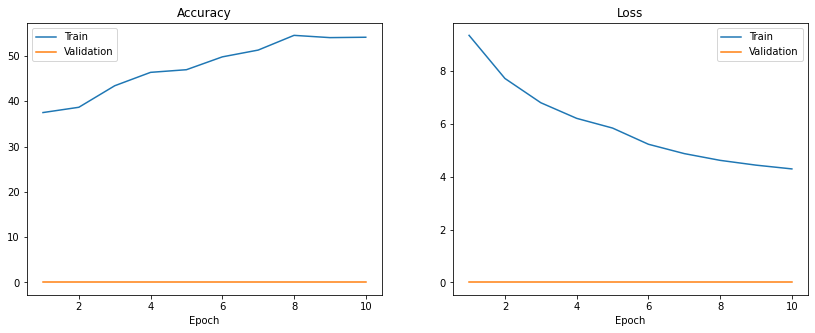

{
  "out_dir": "train_out",
  "adv_train": false,
  "adv_eval": false,
  "epochs": 10,
  "lr": 0.001,
  "optimizer": "Adam",
  "device": "cuda",
  "batch_size": 32,
  "arch": "resnet18",
  "pytorch_pretrained": true,
  "dataset_file_name": "3cls_balanced_2400_train.csv::0",
  "step_lr": null,
  "log_iters": 1,
  "use_adv_prec": true,
  "constraint": "2",
  "eps": 0,
  "attack_lr": 0.0,
  "attack_steps": 7,
  "random_start": true,
  "base_model_expid": null,
  "weight_decay": 0.0005,
  "momentum": 0.9,
  "save_ckpt_iters": -1,
  "use_best": 1,
  "random_restarts": 0,
  "eps_fadein_epochs": 0
}


FileNotFoundError: [Errno 2] File b'/Users/andrei/Google Drive/_Facultate/MPhil Cambridge/Dissertation/logs_local/head_val-fold=0_2400_2020-05-13---08:41:23/accuracies_best.csv' does not exist: b'/Users/andrei/Google Drive/_Facultate/MPhil Cambridge/Dissertation/logs_local/head_val-fold=0_2400_2020-05-13---08:41:23/accuracies_best.csv'

In [6]:
plot_curves_from_file(LOG_DIR, "head_val-fold=0_2400_2020-05-13---08:41:23", True)

epoch  nat_prec1  adv_prec1  nat_loss  adv_loss  train_prec1  train_loss  \
0       1        0.0        0.0       0.0       0.0    20.583334    7.248533   
1       2        0.0        0.0       0.0       0.0    29.333334    1.415028   
2       3        0.0        0.0       0.0       0.0    31.833334    1.294844   
3       4        0.0        0.0       0.0       0.0    37.875000    1.253068   
4       5        0.0        0.0       0.0       0.0    38.458336    1.136029   
5       6        0.0        0.0       0.0       0.0    40.125000    1.110935   
6       7        0.0        0.0       0.0       0.0    43.083336    1.079825   
7       8        0.0        0.0       0.0       0.0    43.666668    1.096859   
8       9        0.0        0.0       0.0       0.0    44.416668    1.094852   
9      10        0.0        0.0       0.0       0.0    45.250000    1.054923   
10     11        0.0        0.0       0.0       0.0    44.750000    1.085890   
11     12        0.0        0.0       0.0   

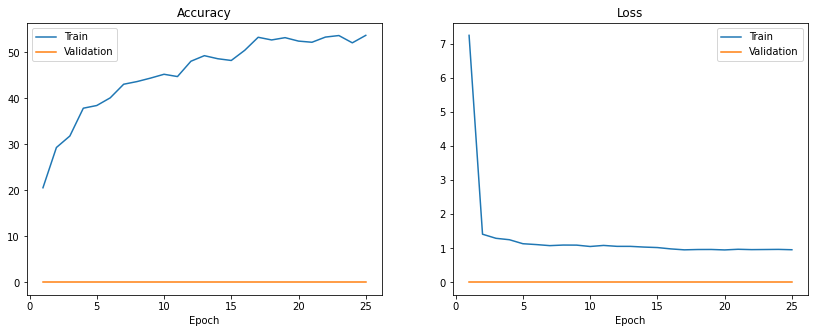

{
  "out_dir": "train_out",
  "adv_train": true,
  "adv_eval": false,
  "epochs": 25,
  "lr": 0.0003,
  "optimizer": "Adam",
  "device": "cuda",
  "batch_size": 16,
  "arch": "resnet18",
  "pytorch_pretrained": true,
  "dataset_file_name": "3cls_balanced_2400_train.csv::0",
  "step_lr": 15,
  "log_iters": 1,
  "use_adv_prec": true,
  "constraint": "2",
  "eps": 4,
  "attack_lr": 0.8,
  "attack_steps": 7,
  "random_start": true,
  "base_model_expid": "head_val-fold=0_2400_2020-05-13---08:41:23",
  "weight_decay": 0.0005,
  "momentum": 0.9,
  "save_ckpt_iters": -1,
  "use_best": 1,
  "random_restarts": 0,
  "eps_fadein_epochs": 0
}


FileNotFoundError: [Errno 2] File b'/Users/andrei/Google Drive/_Facultate/MPhil Cambridge/Dissertation/logs_local/cv=0_full_adv_eps=4_lr=0.0003_2400_2020-05-13---19:46:52/accuracies_best.csv' does not exist: b'/Users/andrei/Google Drive/_Facultate/MPhil Cambridge/Dissertation/logs_local/cv=0_full_adv_eps=4_lr=0.0003_2400_2020-05-13---19:46:52/accuracies_best.csv'

In [4]:
plot_curves_from_file(LOG_DIR, "cv=0_full_adv_eps=4_lr=0.0003_2400_2020-05-13---19:46:52", True)

In [ ]:
plot_curves_from_file(LOG_DIR, "cv=0_full_adv_eps=9_lr=0.0003_2400_2020-05-13---19:46:52", True)